In [42]:
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from pickleshare import *

db = PickleShareDB('~/.ipython/profile_default/db/autorestore')

dictionary = db['dictionary']

dictionary_lookup = db['dictionary_lookup']

sparse_word_doc_matrix = db['sparse_word_doc_matrix']

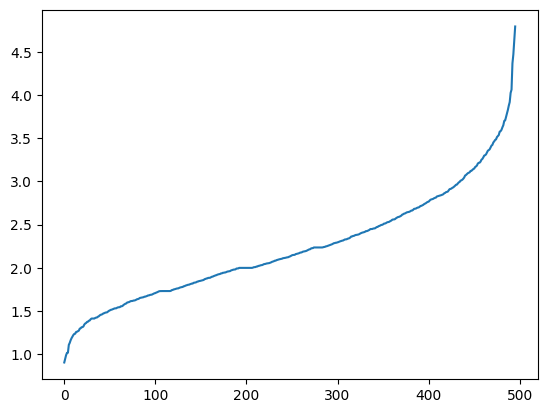

In [46]:
#U S VT
#U & VT representations of isometric transformations of the space
#S/Σ scaling of each xi by factor σi

#try coherence scores  
#or perplexity scores

k_max = (min(sparse_word_doc_matrix.shape)-1)

terms, concepts, documents = svds(sparse_word_doc_matrix, k=k_max)

fig = figure()
singular_values = fig.add_subplot(1,1,1)

singular_values.plot(concepts)





With the basic term-document matrix the singular values were too uniform and there are no reduced dimensions that were representative of the corpus.


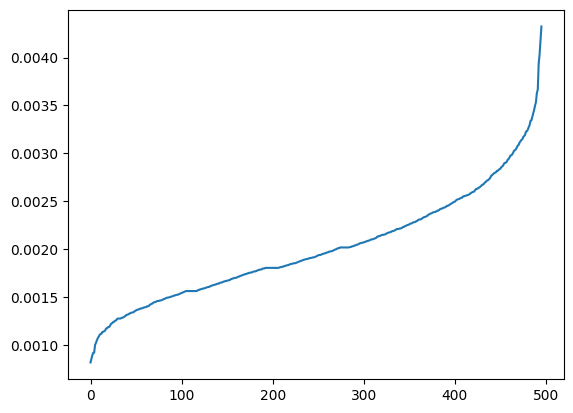


Term-document matrix will be converted to tf-idf before dimensionality reduction. Will compare results.

Until then the next notebook will evaluate cosine similarity using the densest dimensions.


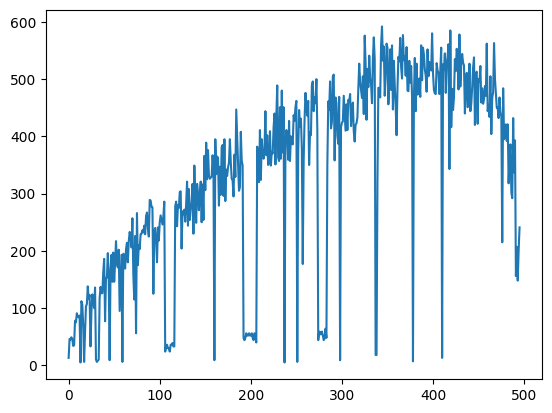

In [44]:
#terms[allwords] dot diagonal matrix of sigma values
terms_s = terms @ np.diag(concepts)

density = np.count_nonzero(np.round(terms_s,1),axis=0)

fig = figure()
density_fig = fig.add_subplot(1,1,1)

density_fig.plot(density)

Stored 'word_vectors_2d' (DataFrame)


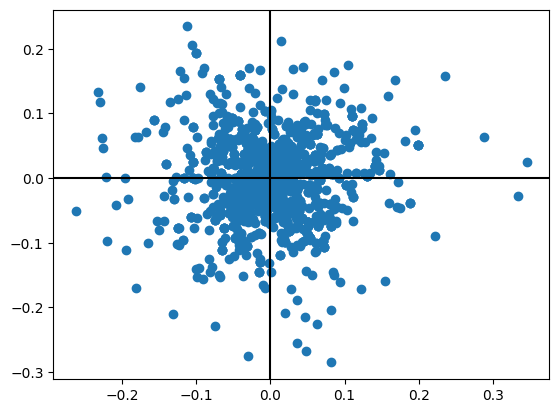

In [45]:
#top dimension with highest density and it's left pair
top_density = (-density).argsort()
y = top_density[0]
x = y-1

#word space vectors in 2d
terms_s_x_y = terms_s[:,[x,y]]


word_vectors_2d = pd.DataFrame(terms_s_x_y, index=dictionary.keys(), columns=['x','y'])


fig = figure()
words_plot = fig.add_subplot(1,1,1)

words_plot.scatter(word_vectors_2d['x'],word_vectors_2d['y'])
words_plot.axhline(y=0, color='k')
words_plot.axvline(x=0, color='k')


%store word_vectors_2d